In [1]:
include("../data-visualization/FBPlots.jl")

using Base.Math
using DataFrames
import CSV

display("text/html", "<style>.container { width:100% !important; }</style>")  # Makes notebook use full browser width

In [2]:
input_file_path = "../data/shot_data_aug_v0.1.csv"
df = DataFrame(CSV.File(input_file_path))
df[1:10, :]

Row,location_x,location_y,body_part,outcome,shot_type,distance,degrees_subtended
,Float64,Float64,String15,String31,String15,Float64,Float64
1,111.5,52.9,Right Foot,Off T,Open Play,12.3069,16.9826
2,113.9,26.4,Left Foot,Off T,Open Play,11.3741,13.3167
3,93.7,34.7,Left Foot,Saved,Open Play,26.3321,16.6444
4,109.2,39.1,Head,Off T,Open Play,10.8,40.4194
5,107.8,24.7,Right Foot,Off T,Open Play,16.6292,14.8953
6,108.6,27.8,Left Foot,Wayward,Open Play,14.0428,19.1384
7,112.5,41.7,Head,Off T,Open Play,7.5,54.2839
8,112.4,41.0,Head,Off T,Open Play,7.6,54.8817
9,102.5,30.1,Right Foot,Saved,Open Play,18.4678,19.8284


## Let's visualize this data

The most basic xG model simply divides the pitch up into zones (in our case we will use 1x1 yard boxes), and counts the proportion of shots resulting in goals from each. So let's see where our shots comes from.

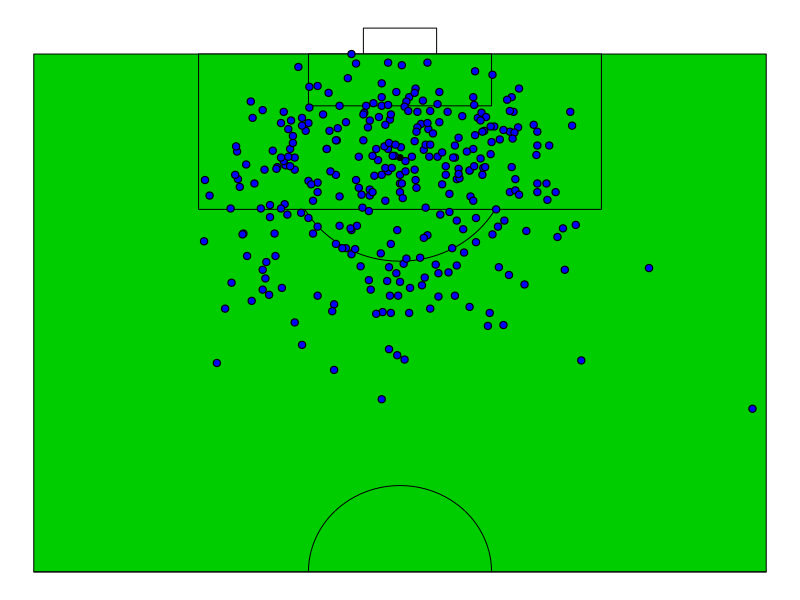

In [3]:
locations = Matrix(df[!, 1:2])
# Plot every 100th shot location
p = get_half_pitch(scale=5)
plot_locations!(p, locations[1:100:size(locations)[1], :])

In [4]:
goal_df = df[df.outcome .== "Goal", :]
goal_df[1:10, :]

Row,location_x,location_y,body_part,outcome,shot_type,distance,degrees_subtended
,Float64,Float64,String15,String31,String15,Float64,Float64
1,105.3,33.4,Right Foot,Goal,Open Play,14.9282,25.7647
2,111.5,36.2,Left Foot,Goal,Open Play,8.5,43.8888
3,111.9,49.0,Right Foot,Goal,Open Play,9.51893,26.3876
4,115.4,36.6,Right Foot,Goal,Open Play,4.6,65.5654
5,110.2,50.8,Right Foot,Goal,Open Play,11.9281,21.7331
6,114.0,35.0,Right Foot,Goal,Open Play,6.08276,46.8476
7,115.8,42.5,Left Foot,Goal,Open Play,4.2,76.7851
8,108.9,29.3,Left Foot,Goal,Open Play,12.9653,21.8281
9,108.3,55.4,Right Foot,Goal,Open Play,16.3355,14.6502


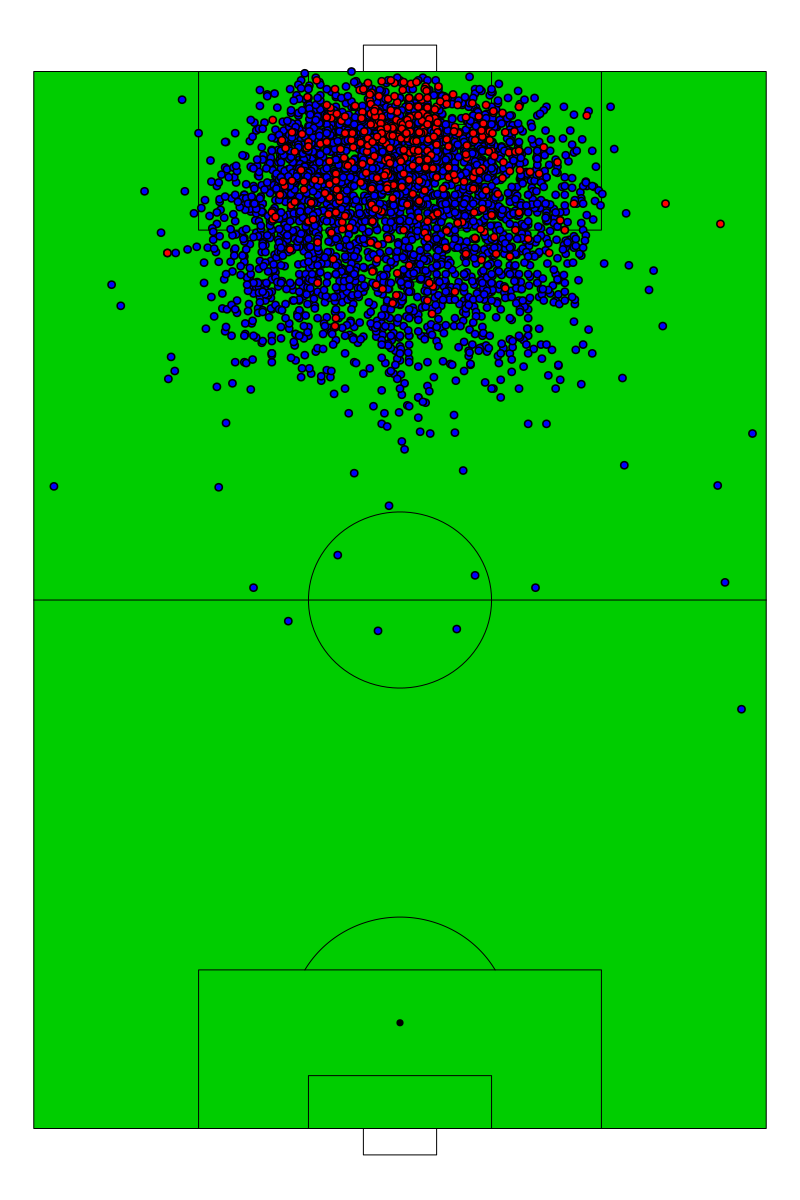

In [5]:
goal_locs = Matrix(goal_df[!, 1:2])
p = get_default_pitch(scale=5)
# Plot every 10th shot and every 10th goal
plot_locations!(p, locations[1:10:size(locations)[1], :], half_pitch=false)
plot_locations!(p, goal_locs[1:10:size(goal_locs)[1], :], markercolor="red", half_pitch=false)

## Let's put shots in boxes

This is really just my excuse to resuscitate this beauty of an exchange. Gotta love Arsenal fans- 

![img](https://i.redd.it/bg0ar2w9bn741.jpg)


That being said, there's a valid question in there relevant to us right now, and believe it or not, I'm siding with @Blackburngeorge. We'll round to the nearest int.

In [6]:
"Plots an xG model purely based on shot location."
function plot_xG_model(xG_model; scale=3, grass_col="white", opacity=0.2, color=:turbo)
    p = get_default_pitch(scale=scale, grass_col=grass_col)
    contourf!(p, LinRange(0, 80, 81), LinRange(0, 120, 121), xG_model, colorbar=true,
              opacity=opacity, color=color)
    return p
end

plot_xG_model

In [7]:
xG_model = zeros(Float64, 121, 81)
total_shots = zeros(Float64, 121, 81)
total_goals = zeros(Float64, 121, 81)
for row in eachrow(df)
    loc_x = Int(round(row[1]))+1
    loc_y = Int(round(row[2]))+1
    total_shots[loc_x, loc_y] += 1
    if row[4] == "Goal"
        total_goals[loc_x, loc_y] += 1
    end
end

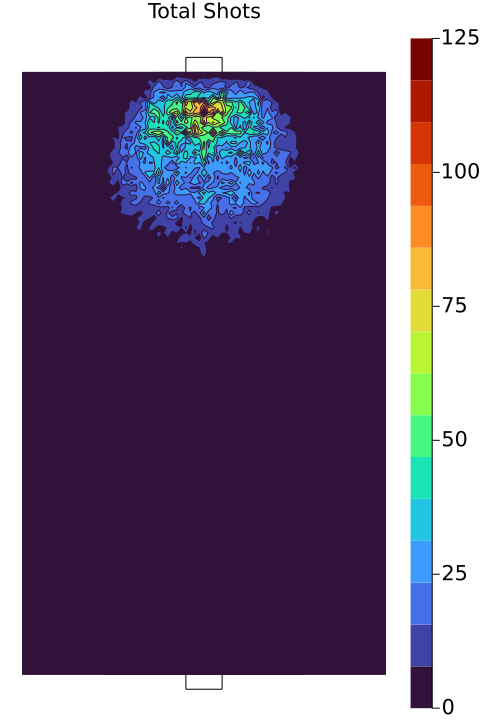

In [8]:
p = plot_xG_model(total_shots, opacity=1)
title!("Total Shots")

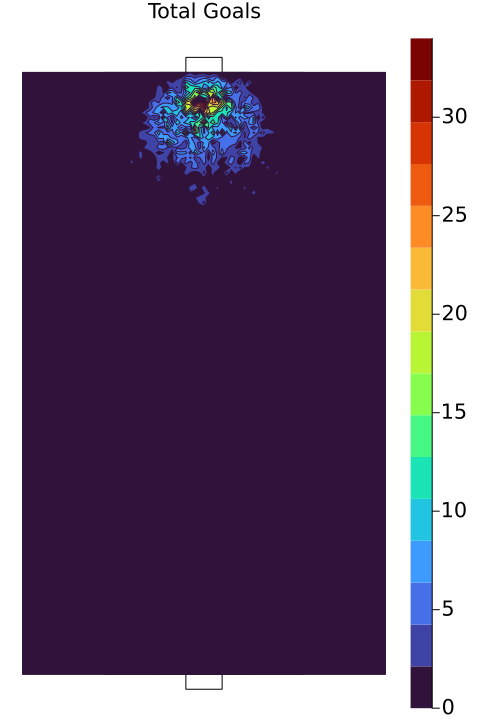

In [9]:
plot_xG_model(total_goals, opacity=1)
title!("Total Goals")

In [10]:
for i=1:size(xG_model)[1]
    for j=1:size(xG_model)[2]
        if total_shots[i, j] == 0
            continue
        end
        xG_model[i, j] = total_goals[i, j] / total_shots[i, j]
    end
end

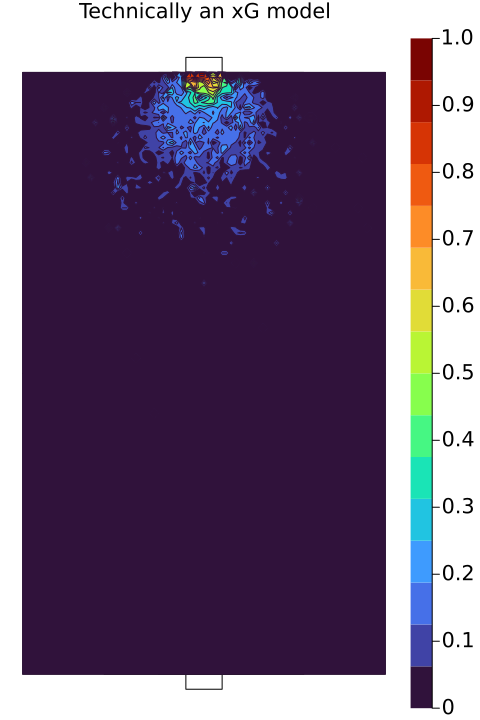

In [11]:
plot_xG_model(xG_model, opacity=1)
title!("Technically an xG model")

In [12]:
df[!, :goal] = Vector{Int8}(df.outcome .== "Goal")
df

Row,location_x,location_y,body_part,outcome,shot_type,distance,degrees_subtended,goal
,Float64,Float64,String15,String31,String15,Float64,Float64,Int8
1,111.5,52.9,Right Foot,Off T,Open Play,12.3069,16.9826,0
2,113.9,26.4,Left Foot,Off T,Open Play,11.3741,13.3167,0
3,93.7,34.7,Left Foot,Saved,Open Play,26.3321,16.6444,0
4,109.2,39.1,Head,Off T,Open Play,10.8,40.4194,0
5,107.8,24.7,Right Foot,Off T,Open Play,16.6292,14.8953,0
6,108.6,27.8,Left Foot,Wayward,Open Play,14.0428,19.1384,0
7,112.5,41.7,Head,Off T,Open Play,7.5,54.2839,0
8,112.4,41.0,Head,Off T,Open Play,7.6,54.8817,0
9,102.5,30.1,Right Foot,Saved,Open Play,18.4678,19.8284,0


In [13]:
df[!, :rdist] = Vector{Int16}(Int.(round.(df.distance)))
df[!, :rang] = Vector{Int16}(Int.(round.(df.degrees_subtended)))
df

Row,location_x,location_y,body_part,outcome,shot_type,distance,degrees_subtended,goal,rdist,rang
,Float64,Float64,String15,String31,String15,Float64,Float64,Int8,Int16,Int16
1,111.5,52.9,Right Foot,Off T,Open Play,12.3069,16.9826,0,12,17
2,113.9,26.4,Left Foot,Off T,Open Play,11.3741,13.3167,0,11,13
3,93.7,34.7,Left Foot,Saved,Open Play,26.3321,16.6444,0,26,17
4,109.2,39.1,Head,Off T,Open Play,10.8,40.4194,0,11,40
5,107.8,24.7,Right Foot,Off T,Open Play,16.6292,14.8953,0,17,15
6,108.6,27.8,Left Foot,Wayward,Open Play,14.0428,19.1384,0,14,19
7,112.5,41.7,Head,Off T,Open Play,7.5,54.2839,0,8,54
8,112.4,41.0,Head,Off T,Open Play,7.6,54.8817,0,8,55
9,102.5,30.1,Right Foot,Saved,Open Play,18.4678,19.8284,0,18,20


In [14]:
display(minimum(df[!, :rdist]))
display(maximum(df[!, :rdist]))
display(minimum(df[!, :rang]))
display(maximum(df[!, :rang]))

0

92

0

180

In [15]:
dists = zeros(Float32, 121)
angs = zeros(Float32, 181)
dists_totals = zeros(Int32, 121)
angs_totals = zeros(Int32, 181)

for row in eachrow(df)
    dists[row[9]+1] += row[8]
    angs[row[10]+1] += row[8]
    dists_totals[row[9]+1] += 1
    angs_totals[row[10]+1] += 1
end

In [16]:
for i=1:length(dists)
    dists[i] /= dists_totals[i]
end

for i=1:length(angs)
    angs[i] /= angs_totals[i]
end

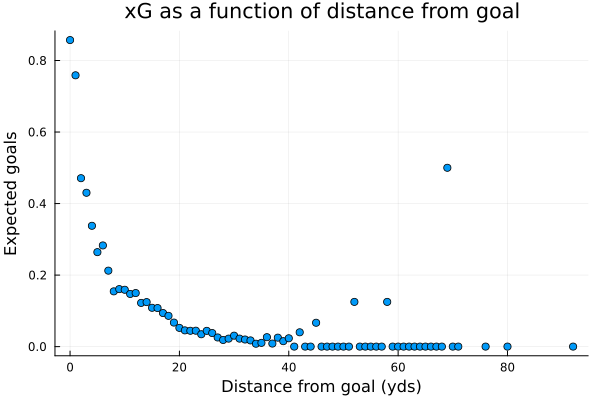

In [19]:
max_dist = maximum(df[!, :rdist])
p = scatter(LinRange(0, max_dist, max_dist+1), dists[1:max_dist+1], legend=false)
title!("xG as a function of distance from goal")
xlabel!("Distance from goal (yds)")
ylabel!("Expected goals")

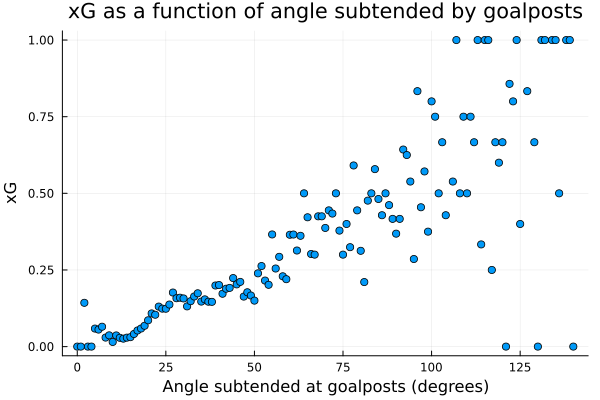

In [20]:
# p = plot(LinRange(0, 180, 181), angs)
max_ang = 140
p = scatter(LinRange(0, max_ang, max_ang+1), angs[1:max_ang], legend=false)
title!("xG as a function of angle subtended by goalposts") 
ylabel!("xG")
xlabel!("Angle subtended at goalposts (degrees)")

### Separate features and RHS for logistic regression

In [38]:
X = Array(df[:, 9:10])
y = Array(df[:, 8])
display(X)
display(y)

31195×2 Matrix{Int16}:
 12  17
 11  13
 26  17
 11  40
 17  15
 14  19
  8  54
  8  55
 18  20
 13  19
 14  26
  6  21
 19  14
  ⋮  
 25  15
 33  13
 22  14
 11  40
 12  23
 10  33
 10  40
 19  24
 29  14
 17  24
 17  19
 20  11

31195-element Vector{Int8}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

### Regression problem

Well let's start with linear regression I guess. We have our vector $X$ that represents all the feature-vectors for our chances in consideration, where $X_i$ represents the $i$-th entry (chance), and $X_{i}^{0}$ is the distance from goal of the $i$-th chance, and $X_{i}^{1}$ is the angle subtended at goalposts.

We want to solve for a function $y^*(X)$ such that 
1. $y^{*} (X)$ is between 0 and 1 for all $X_i$
2. The "loss" or $\left||y^{*}(X) - y|\right|_{2}$ is minimized

Linear regression seeks to draw a straight line through the data. 